<a href="https://colab.research.google.com/github/MpRonald/C/blob/main/Aula_5_Estat%C3%ADstica_e_Probabilidade_Conceitos_Fundamentais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 📌 O que será abordado:
✅ Medidas de tendência central (Média, Mediana, Moda).

✅ Medidas de dispersão (Variância, Desvio Padrão).

✅ Distribuições de probabilidade (Normal, Binomial, Poisson).

✅ Intervalos de Confiança.

✅ Testes de Hipóteses e Testes A/B.

# Medidas de Tendência Central
✅ Média → Soma de todos os valores dividida pelo número total de elementos.

✅ Mediana → Valor central de um conjunto ordenado.

✅ Moda → Valor que mais se repete no conjunto de dados.


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Definindo a seed para garantir reprodutibilidade
np.random.seed(123)

# Definindo o número de linhas do DataFrame
n_linhas = 5000

# Gerando idades aleatórias entre 18 e 80 anos
idades = np.random.randint(18, 50, size=n_linhas)

# Gerando o sexo aleatoriamente (50% masculino, 50% feminino)
sexos = np.random.choice(['M', 'F'], size=n_linhas)

# Criando o DataFrame com Pandas
df = pd.DataFrame({'idade': idades, 'sexo': sexos})

# Exibindo as primeiras 5 linhas do DataFrame
df.head()


,idade,sexo
0,48,F
1,31,M
2,48,M
3,20,M
4,46,F


In [16]:
# Cálculo da média (idade média do grupo)
media_idade = df['idade'].mean()
print(f"Média da idade: {media_idade:.2f}")

# Cálculo da mediana (valor central da distribuição de idades)
mediana_idade = df['idade'].median()
print(f"Mediana da idade: {mediana_idade}")

# Cálculo da moda (idade mais frequente no grupo)
moda_idade = df['idade'].mode()
print(f"Moda da idade: {moda_idade[0]}")


Média da idade: 33.68
Mediana da idade: 34.0
Moda da idade: 44


### Medidas de Dispersão
As medidas de dispersão mostram o grau de variação dos dados.

✅ Variância → Mede o quanto os valores diferem da média.

✅ Desvio Padrão → Mede a dispersão, mas na mesma unidade dos dados.

In [17]:
# Cálculo da variância (mede a dispersão em relação à média)
variancia_idade = df['idade'].var()
print(f"Variância da idade: {variancia_idade:.2f}")

# Cálculo do desvio padrão (mede a dispersão na mesma unidade da idade)
desvio_padrao_idade = df['idade'].std()
print(f"Desvio Padrão da idade: {desvio_padrao_idade:.2f}")

Variância da idade: 84.66
Desvio Padrão da idade: 9.20


In [18]:
# Interpretação:
# Uma variância de 84.66 significa que as idades do dataset estão relativamente
# espalhadas, mas para entender melhor essa dispersão, olhamos para o desvio padrão.

# Interpretação:
# Um desvio padrão de 9.20 indica que a maioria das idades está cerca de
# 9 anos acima ou abaixo da média.

### Distribuições de Probabilidade
🔹 Distribuição Normal da Idade

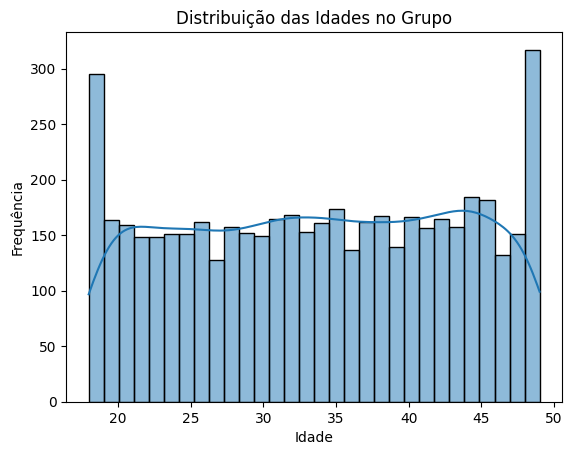

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um histograma da distribuição das idades
sns.histplot(df['idade'], bins=30, kde=True)
plt.title("Distribuição das Idades no Grupo")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

### Intervalo de Confiança para a Média da Idade
Aqui estimamos um intervalo dentro do qual a média verdadeira da população pode estar com 95% de confiança.

In [20]:
import statsmodels.stats.api as sms

# Criando um objeto de estatísticas descritivas
estatisticas = sms.DescrStatsW(df['idade'])

# Calculando o intervalo de confiança de 95%
intervalo_conf = estatisticas.tconfint_mean(alpha=0.05)

print(f"Intervalo de Confiança para a média da idade: {intervalo_conf}")

Intervalo de Confiança para a média da idade: (33.42750784919467, 33.93769215080533)


In [21]:
# O que significa esse intervalo?
# A média amostral da idade está em torno de 33.68 anos (o ponto médio do intervalo).
# Com 95% de confiança, a média da população está entre 33.43 e 33.94 anos.
# Se repetíssemos essa amostra muitas vezes, em 95% dos casos, o verdadeiro
# valor médio da idade estaria dentro desse intervalo.
# Esse intervalo sugere que a média da idade está bem estimada, com pouca margem de erro.
# Se quisermos um intervalo mais estreito (mais precisão),
# precisaríamos aumentar o tamanho da amostra. 🚀

### Teste de Hipóteses:
Comparação da Média da Idade Entre Homens e Mulheres
Verificamos se a idade média dos homens e das mulheres é estatisticamente diferente.

In [23]:
# Separando os grupos por sexo
homens = df[df['sexo'] == 'M']['idade']
mulheres = df[df['sexo'] == 'F']['idade']

# Realizando o teste T para comparar as médias
t_stat, p_valor, df = sm.stats.ttest_ind(homens, mulheres)

print(f"Estatística T: {t_stat:.4f}, p-valor: {p_valor:.4f}")

# Interpretando o resultado
if p_valor < 0.05:
    print("Rejeitamos H₀: A média das idades entre homens e mulheres é significativamente diferente.")
else:
    print("Não rejeitamos H₀: Não há diferença significativa entre as idades dos grupos.")

Estatística T: 0.6838, p-valor: 0.4941
Não rejeitamos H₀: Não há diferença significativa entre as idades dos grupos.


### Teste A/B

In [24]:
import numpy as np
import pandas as pd

# Definindo o número de usuários no experimento
n_linhas = 5000

# Criando um grupo aleatório (50% dos usuários em A, 50% em B)
grupos = np.random.choice(['A', 'B'], size=n_linhas)

# Simulando taxas de conversão para cada grupo (grupo B tem conversão ligeiramente maior)
conversao = np.where(grupos == 'A',
                     np.random.choice([0, 1], size=n_linhas, p=[0.90, 0.10]),  # Grupo A: 10% de conversão
                     np.random.choice([0, 1], size=n_linhas, p=[0.85, 0.15]))  # Grupo B: 15% de conversão

# Criando o DataFrame
df_ab = pd.DataFrame({'grupo': grupos, 'conversao': conversao})

# Exibindo as primeiras linhas
print(df_ab.head())


  grupo  conversao
0     A          0
1     B          0
2     A          0
3     A          0
4     A          0


In [ ]:
# O que é Taxa de Conversão no Teste A/B?
# A taxa de conversão em um teste A/B mede quantos usuários realizaram uma
# ação desejada (exemplo: clique, compra, cadastro) em relação ao número
# total de usuários expostos a uma variação do experimento.

In [25]:
# Calculando a taxa de conversão para cada grupo
taxa_conversao = df_ab.groupby('grupo')['conversao'].mean()

print("Taxa de conversão por grupo:")
print(taxa_conversao)


Taxa de conversão por grupo:
grupo
A    0.090729
B    0.163166
Name: conversao, dtype: float64


### Analisando as Taxas de Conversão

In [26]:
# Calculando a taxa de conversão para cada grupo
taxa_conversao = df_ab.groupby('grupo')['conversao'].mean()

print("Taxa de conversão por grupo:")
print(taxa_conversao)


Taxa de conversão por grupo:
grupo
A    0.090729
B    0.163166
Name: conversao, dtype: float64


### Teste A/B: Comparação das Taxas de Conversão
Agora aplicamos um Teste T para verificar se há diferença significativa entre as taxas de conversão dos dois grupos.

In [28]:
import statsmodels.api as sm

# Separando as conversões dos dois grupos
grupo_A = df_ab[df_ab['grupo'] == 'A']['conversao']
grupo_B = df_ab[df_ab['grupo'] == 'B']['conversao']

# Aplicando o Teste T
t_stat, p_valor, df = sm.stats.ttest_ind(grupo_A, grupo_B)

print(f"Estatística T: {t_stat:.4f}, p-valor: {p_valor:.4f}")

# Interpretando o resultado
if p_valor < 0.05:
    print("Rejeitamos H₀: A nova campanha (Grupo B) teve um impacto significativo na conversão.")
else:
    print("Não rejeitamos H₀: Não há evidência estatística de que a nova campanha alterou a conversão.")


Estatística T: -7.7460, p-valor: 0.0000
Rejeitamos H₀: A nova campanha (Grupo B) teve um impacto significativo na conversão.
